In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import pymaid
import navis
import seaborn as sns
import scikit_posthocs as sp

#connect your catmaid instance
instance=pymaid.CatmaidInstance('https://radagast.hms.harvard.edu/catmaidaedes',"<token>")

INFO  : Global CATMAID instance set. Caching is ON. (pymaid)


In [2]:
#fetch MD1 neurons
celltype = pymaid.get_skids_by_annotation(['sensory neuron', 'innervates MD1', 'left palp nerve', 'PSPs done'], allow_partial = False, intersect = True)
neurons = pymaid.get_neuron(celltype)

#loop through all the neurons and append cable length to a list
MD1=[]
for n in neurons:
	cablelength=n.cable_length
	MD1.append(cablelength)
int=1000
MD1=[x/int for x in MD1]
print(MD1)

Fetch neurons:   0%|          | 0/10 [00:00<?, ?it/s]

Make nrn:   0%|          | 0/10 [00:00<?, ?it/s]

[648.5470625, 516.8784375, 645.1099375, 534.275375, 619.301625, 536.363625, 477.346125, 622.6729375, 366.4569375, 722.904375]


In [3]:
#fetch MD2 neurons
celltype = pymaid.get_skids_by_annotation(['sensory neuron', 'innervates MD2', 'left palp nerve', 'PSPs done'], allow_partial = False, intersect = True)
neurons = pymaid.get_neuron(celltype)

#loop through all the neurons and append cable length to a list
MD2=[]
for n in neurons:
	cablelength=n.cable_length
	MD2.append(cablelength)
MD2=[x/int for x in MD2]
print(MD2)

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Fetch neurons:   0%|          | 0/10 [00:00<?, ?it/s]

Make nrn:   0%|          | 0/10 [00:00<?, ?it/s]

[297.5906875, 279.616375, 254.93096875, 264.6409375, 282.7348125, 238.368140625, 212.197, 276.4310625, 272.6740625, 251.13403125]


In [4]:
#fetch MD3 neurons
celltype = pymaid.get_skids_by_annotation(['sensory neuron', 'innervates MD3', 'left palp nerve', 'PSPs done'], allow_partial = False, intersect = True)
neurons = pymaid.get_neuron(celltype)

#loop through all the neurons and append cable length to a list
MD3=[]
for n in neurons:
	cablelength=n.cable_length
	MD3.append(cablelength)
MD3=[x/int for x in MD3]
print(MD3)

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Fetch neurons:   0%|          | 0/10 [00:00<?, ?it/s]

Make nrn:   0%|          | 0/10 [00:00<?, ?it/s]

[252.2236875, 230.625984375, 237.6271875, 283.1435625, 219.936578125, 243.443671875, 194.83296875, 224.946875, 232.865015625, 206.728109375]


In [5]:
from seaborn.categorical import _ViolinPlotter
class MyVPlot(_ViolinPlotter):
    def draw_quartiles(self, ax, data, support, density, center, split=False, color='k'):
        """Draw the quartiles as lines at width of density."""
        q50 = np.mean(data)
        self.draw_to_density(ax, center, q50, support, density, split,
                             linewidth=self.linewidth, color=color)

def my_violinplot2(x=None, y=None, hue=None, data=None, order=None, hue_order=None,
                  bw="scott", cut=0, scale="area", scale_hue=True, gridsize=100,
                  width=.8, inner="quartiles", split=False, dodge=True, orient=None,
                  linewidth=None, color=None, palette=None, saturation=.75,alpha=1,
                  ax=None, edgecolor=None, **kwargs):

    plotter = MyVPlot(x, y, hue, data, order, hue_order,
                      bw, cut, scale, scale_hue, gridsize,
                      width, inner, split, dodge, orient, linewidth,
                      color, palette, saturation)
    if ax is None:
        ax = plt.gca()

    plotter.plot(ax)
    # change outlines
    colors=["violet", "#0000FF", 'mediumspringgreen']
    for idx, violin in enumerate(ax.collections):
        violin.set_edgecolor(colors[idx])
    for l in ax.lines:
        l.set_linestyle('-')
        l.set_color('k')
    return ax

In [6]:
#make dataframe

data_dict = {"1": MD1, "2": MD2, "3": MD3}
pre_df = {"Glomerulus": [], "OSN cable length (µm)": []}
for glom, dists in data_dict.items():
    glom_list = [glom,]*len(dists)
    pre_df["Glomerulus"].extend(glom_list)    
    pre_df["OSN cable length (µm)"].extend(dists)

df = pd.DataFrame.from_dict(pre_df)
df

,Glomerulus,OSN cable length (µm)
0,1,648.547063
1,1,516.878438
2,1,645.109938
3,1,534.275375
4,1,619.301625
5,1,536.363625
6,1,477.346125
7,1,622.672937
8,1,366.456937
9,1,722.904375


findfont: Font family ['Liberation Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Sans'] not found. Falling back to DejaVu Sans.


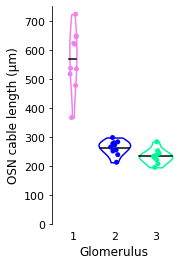

In [7]:
#make plot with annotations, from dataframe
x = "Glomerulus"
y = "OSN cable length (µm)"
order = ['1', '2', '3']
ax = my_violinplot2(data=df, x=x, y=y, order=order, color="1")
ax = sns.stripplot(data=df, x=x, y=y, order=order, palette=["violet", "#0000FF", "mediumspringgreen"])
ax.set_xlabel('Glomerulus', size=12, fontname="Liberation Sans")
ax.set_ylabel('OSN cable length (µm)', size=12, fontname="Liberation Sans")
plt.xticks(fontsize=11, fontname="Liberation Sans")
plt.yticks(fontsize=11, fontname="Liberation Sans")
plt.ylim(0, 750)
ax.set_aspect(0.007)
plt.tick_params(axis='x', which='both', bottom=False, top=False)
plt.tick_params(axis='y', which='both', left=True, right=False)
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False)

plt.savefig('../svg/cablelength.svg', format="svg")

plt.show()

In [8]:
md1=df[df[x]=="1"]
md1=md1[y].values.tolist()
md2=df[df[x]=='2']
md2=md2[y].values.tolist()
md3=df[df[x]=='3']
md3=md3[y].values.tolist()

stats.kruskal(md1, md2, md3) # non-parametric anova

KruskalResult(statistic=21.834838709677427, pvalue=1.8139487705309684e-05)

In [9]:
sp.posthoc_dunn(df,y,x,'bonferroni')

,1,2,3
1,1.000000,0.007518,0.000013
2,0.007518,1.000000,0.345907
3,0.000013,0.345907,1.000000
